# Part 1 - What is geocoding? 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-the-concept-of-geocoding?" data-toc-modified-id="What-is-the-concept-of-geocoding?-1">What is the concept of geocoding?</a></span></li><li><span><a href="#Ways-to-geocode" data-toc-modified-id="Ways-to-geocode-2">Ways to geocode</a></span><ul class="toc-item"><li><span><a href="#Using-the-geocode-module" data-toc-modified-id="Using-the-geocode-module-2.1">Using the <code>geocode</code> module</a></span></li><li><span><a href="#Using-geoanalytics-module-for-big-datasets" data-toc-modified-id="Using-geoanalytics-module-for-big-datasets-2.2">Using <code>geoanalytics</code> module for big datasets</a></span></li></ul></li><li><span><a href="#How-geocoding-works?" data-toc-modified-id="How-geocoding-works?-3">How geocoding works?</a></span><ul class="toc-item"><li><span><a href="#What-are-geocoders-and-their-types?" data-toc-modified-id="What-are-geocoders-and-their-types?-3.1">What are geocoders and their types?</a></span><ul class="toc-item"><li><span><a href="#About-ArcGIS-World-Geocoding-Service" data-toc-modified-id="About-ArcGIS-World-Geocoding-Service-3.1.1">About <code>ArcGIS World Geocoding Service</code></a></span></li><li><span><a href="#About-Custom-Geocoding-Service" data-toc-modified-id="About-Custom-Geocoding-Service-3.1.2">About <code>Custom Geocoding Service</code></a></span></li></ul></li><li><span><a href="#Features-of-geocoding-services" data-toc-modified-id="Features-of-geocoding-services-3.2">Features of geocoding services</a></span><ul class="toc-item"><li><span><a href="#What-is-needed-to-geocode?" data-toc-modified-id="What-is-needed-to-geocode?-3.2.1">What is needed to geocode?</a></span></li><li><span><a href="#Geocoding-capabilities" data-toc-modified-id="Geocoding-capabilities-3.2.2">Geocoding capabilities</a></span></li><li><span><a href="#Geocoding-coverage" data-toc-modified-id="Geocoding-coverage-3.2.3">Geocoding coverage</a></span></li></ul></li><li><span><a href="#Cost-of-geocoding" data-toc-modified-id="Cost-of-geocoding-3.3">Cost of geocoding</a></span></li></ul></li><li><span><a href="#Layout-of-the-arcgis.geocoding-module" data-toc-modified-id="Layout-of-the-arcgis.geocoding-module-4">Layout of the <code>arcgis.geocoding</code> module</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5">Conclusions</a></span></li></ul></div>

## What is the concept of geocoding?

`Geocoding` with ArcGIS, in short, is to convert your addresses and place names into co-ordinates and put them on a map. <img height="250px" width="350px" src="https://developers.arcgis.com/assets/img/features/features-hero_geocoding.png" align="right"/> 

A full explanation of the concept is also given as: 

<div class="inner_cell">
    <div class="text_cell_render border-box-sizing rendered_html">
        <blockquote>
            <p>"Geocoding is the process of transforming a description of a location — such as a pair of coordinates, an address, or a name of a place — to a location on the earth's surface. You can geocode by entering one location description at a time or by providing many of them at once in a table. The resulting locations are output as geographic features with attributes, which can be used for mapping or spatial analysis.

You can quickly find various kinds of locations through geocoding. The types of locations that you can search for include points of interest or names from a gazetteer, like mountains, bridges, and stores; coordinates based on latitude and longitude or other reference systems, such as the Military Grid Reference System (MGRS) or the U.S. National Grid system; and addresses, which can come in a variety of styles and formats, including street intersections, house numbers with street names, and postal codes at the <a href="https://desktop.arcgis.com/en/arcmap/latest/manage-data/geocoding/what-is-geocoding.htm">help document</a>."</p>
        </blockquote>
    </div>
</div>

The most popular use cases of geocoding include:
 - Locate an address
 - Search for places
 - Search for intersections
 - Find nearest address
 - Batch geocoding

## Ways to geocode

### Using the `geocode` module

For simple addresses, such as a street address, street name, or street intersection, you can perform the search using the `geocode()` method. For best results, you should include as much location information as possible in the search in addition to the street address. 

You can pass the address components as `a single address string` or separated into multiple parameters using `a dict object`. Examples of each are shown below. Note that in each case the response is the same for both the single and multiple parameter addresses. 

To start with, import `geocoding` and `gis` modules, and initialize a `GIS` connection to ArcGIS Online organization, or to ArcGIS Enterprise. 

In [1]:
from arcgis.geocoding import geocode
from arcgis.gis import GIS

Note here, you can either create the `GIS` with username and password or with the `api_key` parameter, e.g. `gis = GIS(api_key=<your api key>)`.

<div class="inner_cell">
    <div class="text_cell_render border-box-sizing rendered_html">
        <blockquote>
            <p>An `Application programming interface key` (`API key`) is a permanent access token that defines the scope and permission for granting your public-facing application access to specific, ready-to-use services and private content. If you already have an ArcGIS account, you can sign in to view your default API key or to create a new API key. An API key is created for you when you sign up for an ArcGIS Developer account.

For more, check out the <a href="https://developers.arcgis.com/documentation/mapping-apis-and-services/security/api-keys/">API Keys Doc</a>.</p>
        </blockquote>
    </div>
</div>

In [ ]:
gis = GIS(api_key=<your api key>)
# or
# gis = GIS("portal url", "username", "password") 

In [5]:
single_line_address = "380 New York Street, Redlands, CA 92373"

In [6]:
# geocode the single line address
esrihq = geocode(single_line_address)[0]


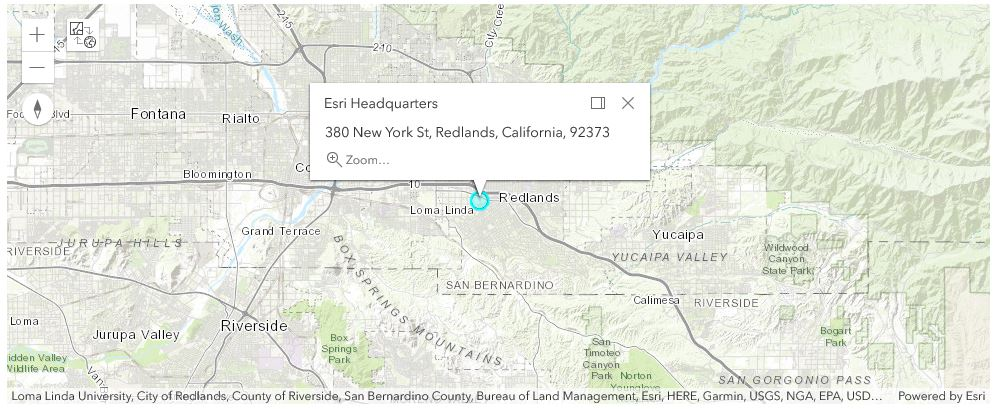

In [13]:
map = gis.map("Redlands, CA")
map

In [8]:
# plot the location of the first geocode result on the map
popup = { 
    "title" : "Esri Headquarters", 
    "content" : esrihq['address']
    }
map.draw(esrihq['location'], popup)

Now, let's try inputing address in multiple parameters - the city component (`Redlands`) as the value for the city parameter, the state component (`CA`) as the region parameter, and the zip code (`92373`) as the value for the postal parameter.

In [9]:
multi_field_address = { 
                        "Address" : "380 New York Street",
                        "City" : "Redlands",
                        "Region" : "CA",
                        "Postal" : 92373
                      }

In [10]:
# geocode the multi_field_address
esrihq1 = geocode(multi_field_address)[0]


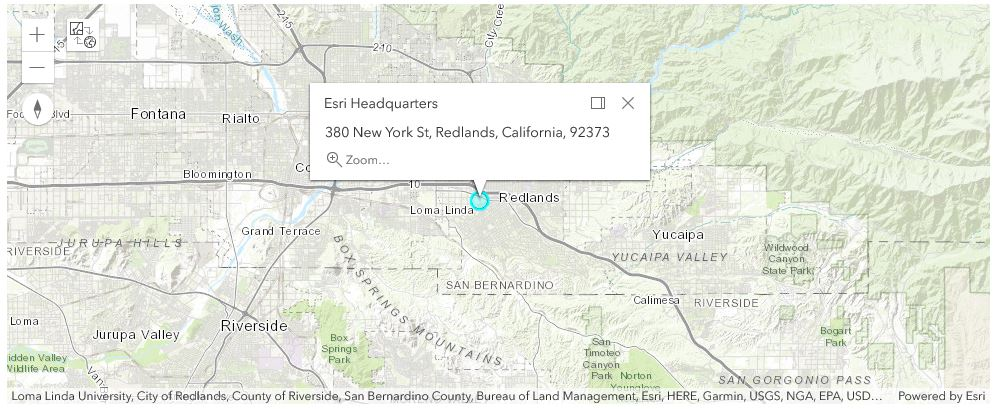

In [14]:
map1 = gis.map("Redlands, CA")
map1

In [12]:
# plot the location of the first geocode result on the map
popup = { 
    "title" : "Esri Headquarters", 
    "content" : esrihq1['address']
    }
map1.draw(esrihq1['location'], popup)

### Using `geoanalytics` module for big datasets

Besides the `geocode()` function we have seen above, another way to perform geocoding is to use the locator service within the <a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-geocoding-best-practices.htm">ArcGIS GeoAnalytics Server</a> for big datasets. The syntax for using the `geocode_locations()` function of the `geoanalytics` module is shown below: 

```
arcgis.geoanalytics.find_locations.geocode_locations(input_layer, country=None, category=None, 
                                                     include_attributes=True, locator_parameters=None, 
                                                     output_name=None, geocode_service=None, 
                                                     geocode_parameters=None,
                                                     gis=None, context=None, future=False)
```

The `geocode_locations` task geocodes a table from a big data file share, using a geocode utility service configured with your enterprise. The pre-requisite of applying this function is to have a geocode utility service configured.

## How geocoding works?

### What are geocoders and their types?

`Geocoders` are tools that can find spatial coordinates of addresses, business names, places of interest and so on. The output points can be visualized on a map, inserted as stops for a route, or loaded as input for spatial analysis. They also used to generate batch results for a set of addresses, as well as for reverse geocoding, i.e. determining the address at a particular x/y location.

`Geocoders` have numerous properties accessed through `geocoder.properties`. These properties specify the types of information the `geocode()` function accepts as input and the structure of the outputs when performing geocoding operations using a particular geocoder. A geocoder's properties also define any limits or requirements established by the underlying locator.

#### About `ArcGIS World Geocoding Service`

The <a href="https://desktop.arcgis.com/en/arcmap/latest/manage-data/geocoding/working-with-arcgis-online-geocoding-service.htm">`ArcGIS World Geocoding Service`</a> allows you to find addresses or places in the world, geocode a table of addresses, or `reverse geocode` a location without the need to purchase the reference dataset for creating the locators. The service references rich and high-quality point and street address data, places, and gazetteers that cover much of the world. The World Geocoding Service is widely available. All you need to access it is a connection to an ArcGIS Online organization or Enterprise and the proper credentials, which may make it unnecessary for you to set up the service on your own instance of ArcGIS Server or enterprise. The service is intended to simplify the workflows of developers and GIS professionals.

A `GIS` includes one or more `geocoders`. The list of geocoders registered with the GIS can be queried using `get_geocoders()`. This method returns a list of Geocoder instances. In the example below, there is one registered Geocoder with the GIS, that uses the Esri World Geocoding Service for geocoding:

In [2]:
from arcgis.geocoding import Geocoder, get_geocoders

my_geocoder = get_geocoders(gis)[0]
my_geocoder

<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">

The first available `geocoder` in the active GIS is used by default, unless specified, and all geocoding functions have an optional parameter for specifying the geocoder to be used.

The newest GIS object being created will have its first available `geocoder` as the default geocoder unless `set_active=False` is passed in the GIS constructor. However, you can also use a different `Geocoder` by specifying it explicitly as a method parameter.

##### Using the default geocoder

In [10]:
from arcgis.geocoding import geocode
results = geocode('New York St, Redlands, CA')
# query the first matched result
results[0]['location']

{'x': -117.19554992262067, 'y': 34.06455843099906}

##### Properties of the geocoder class

In [5]:
[prop_name for prop_name in my_geocoder.properties.keys()]

['currentVersion',
 'serviceDescription',
 'addressFields',
 'categories',
 'singleLineAddressField',
 'candidateFields',
 'spatialReference',
 'locatorProperties',
 'detailedCountries',
 'countries',
 'capabilities']

##### `addressFields` property

The Geocoder's `addressFields` property specifies the various address fields accepted by it when geocoding addresses. For instance, the address fields accepted by this geocoder, and their length, are the following:

In [6]:
for addr_fld in my_geocoder.properties.addressFields:
    print(addr_fld['name'] + " (" + str(addr_fld['length']) +" chars)")

Address (100 chars)
Address2 (100 chars)
Address3 (100 chars)
Neighborhood (50 chars)
City (50 chars)
Subregion (50 chars)
Region (50 chars)
Postal (20 chars)
PostalExt (20 chars)
CountryCode (100 chars)


##### `singleLineAddressField` property

The geocoder may also support a single line address field. Single field input is easier because the address parsing is done for you; however, multi-field input may provide faster responses and more precise results. The field name can be found using the code below:

In [7]:
my_geocoder.properties.singleLineAddressField['name']

'SingleLine'

When using single line input for the address, it is unnecessary (though supported) to create a `dict` with this key and the single line address as it's value. The address can be passed in directly as a text string.

One instance of when you might use a dict to include the `SingleLine` parameter is when it is combined with the `countryCode` parameter. The `SingleLine` parameter cannot be used with any of the other multi-field parameters.

##### `categories` property

The `categories` property can be used to limit result to one or more categories. For example, "Populated Place" or "Scandinavian Food". It is only applicable to the World Geocoding Service. The following code lists the entire hierarchy of supported category values.

In [8]:
def list_categories(obj, depth = 0):       
    for category in obj['categories']:
        print('\t'*depth  + category['name'])
        if 'categories' in category:
            list_categories(category, depth + 1)
            
list_categories(my_geocoder.properties)

Address
	Subaddress
	Point Address
	Street Address
	Distance Marker
	Intersection
	Street Name
Postal
	Primary Postal
	Postal Locality
	Postal Extension
Coordinate System
	LatLong
	XY
	YX
	MGRS
	USNG
Populated Place
	Block
	Sector
	Neighborhood
	District
	City
	Metro Area
	Subregion
	Region
	Territory
	Country
	Zone
POI
	Arts and Entertainment
		Amusement Park
		Aquarium
		Art Gallery
		Art Museum
		Billiards
		Bowling Alley
		Casino
		Cinema
		Historical Monument
		History Museum
		Indoor Sports
		Jazz Club
		Landmark
		Live Music
		Museum
		Other Arts and Entertainment
		Performing Arts
		Ruin
		Science Museum
		Tourist Attraction
		Wild Animal Park
		Zoo
	Education
		College
		Fine Arts School
		Other Education
		School
		Vocational School
	Food
		African Food
		American Food
		Argentinean Food
		Australian Food
		Austrian Food
		Bakery
		Balkan Food
		BBQ and Southern Food
		Belgian Food
		Bistro
		Brazilian Food
		Breakfast
		Brewpub
		British Isles Food
		Burgers
		Cajun and Creo

#### About `Custom Geocoding Service`

Next, let's look at two ways to create a custom geocoder:


##### Creating a geocoder using a geocoding service item

Geocoding services can be published as items in the GIS. An instance of the geocoder can also be constructed by passing in a reference to these items from the GIS to the Geocoder's constructor:

In [4]:
from IPython.display import display

arcgis_online = GIS()
items = arcgis_online.content.search('Geocoder', 'geocoding service', max_items=3)
for item in items: 
    display(item)
    
# construct a geocoder using the first geocoding service item
worldgeocoder = Geocoder.fromitem(items[0])
worldgeocoder   

<Item title:"Esri Nederland BAG Geocoder" type:Geocoding Layer owner:Esri_NL_Content>

<Item title:"World Geocoding" type:Geocoding Layer owner:esri>

<Item title:"Vue France du service de géocodage mondial d'ArcGIS" type:Geocoding Layer owner:rgarnier_esrifrance>

<Geocoder url:"https://services.arcgisonline.nl/arcgis/rest/services/Geocoder_BAG_RD/GeocodeServer">

##### Creating a geocoder from a geocoding service
Geocoders may also be created using the constructor by passing in their location, such as a url to a Geocoding Service. If the geocoding service is a secure service, pass in the GIS to which it is federated with as the gis parameter:

In [12]:
geocoder_url = 'https://services.arcgisonline.nl/arcgis/rest/services/Geocoder_BAG_RD/GeocodeServer'
esrinl_geocoder = Geocoder(geocoder_url, gis)
esrinl_geocoder

<Geocoder url:"https://services.arcgisonline.nl/arcgis/rest/services/Geocoder_BAG_RD/GeocodeServer">

Next, let's look at an example below that shows calling the geocode() function to geocode an address. It specifies that the esrinl_geocoder created above should be used for geocoding by passing it in explicitly.

In [13]:
results = geocode('Raadhuisstraat 52, 1016 Amsterdam',  geocoder=esrinl_geocoder)
results[0]['location']

{'x': 120842.00295538307, 'y': 487472.9997233087, 'z': 0}

### Features of geocoding services

#### What is needed to geocode?

Summarizing the requirements for performing `geocode` that have been mentioned above, you need to meet either one of the two criteria:

 - You need to have a subscription to the ArcGIS Online for organization. If not, then sign up for <a href="https://links.esri.com/arcgis-online-free-trial">a developer account</a>. 
 
 - You are using the ArcGIS Enterprise with custom geocoding service or Utility service configured. Refer to the <a href="https://enterprise.arcgis.com/en/portal/latest/administer/windows/configure-portal-to-geocode-addresses.htm">Enterprise doc</a> about this.

#### Geocoding capabilities

Generally the capabilities of geocoding include: 
 - Locate an address 
   - also known as `address search`, is the process of converting text for an address or place to a complete address with a location. For example, you can convert `1600 Pennsylvania Ave NW, DC` to `-77.03654 longitude and 38.89767 latitude`.
 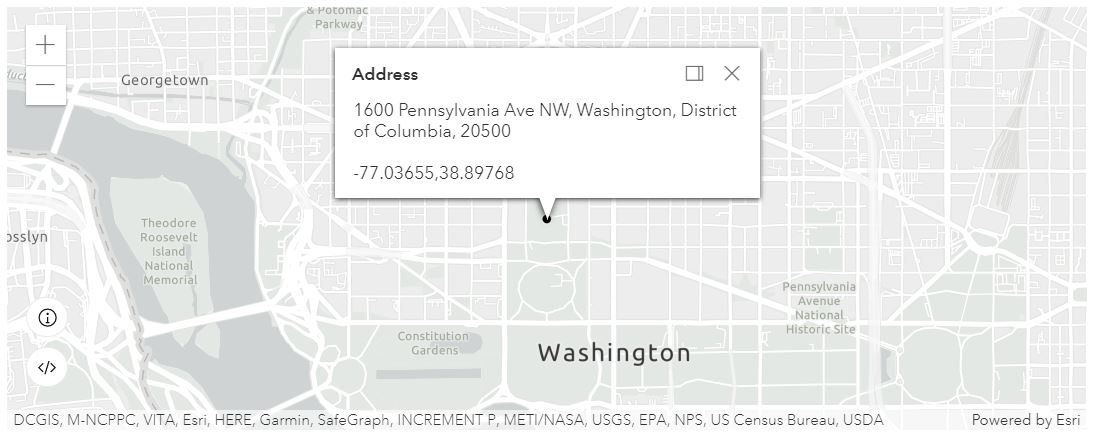

 - Search for places; User can use geocode() to
   - Find the locations of geographic places around the world.
   - Locate businesses near a location.
   - Search for places: A user can use geocode() to find the locations of geographic places around the world, locate businesses near a location, search for places by category, such as restaurants, gas stations, or schools (The Geocoding Service allows you to search for different categories of places, such as businesses, restaurants, geographic features, and administrative areas), or find and display places on a map.



   - Find and display places on a map.
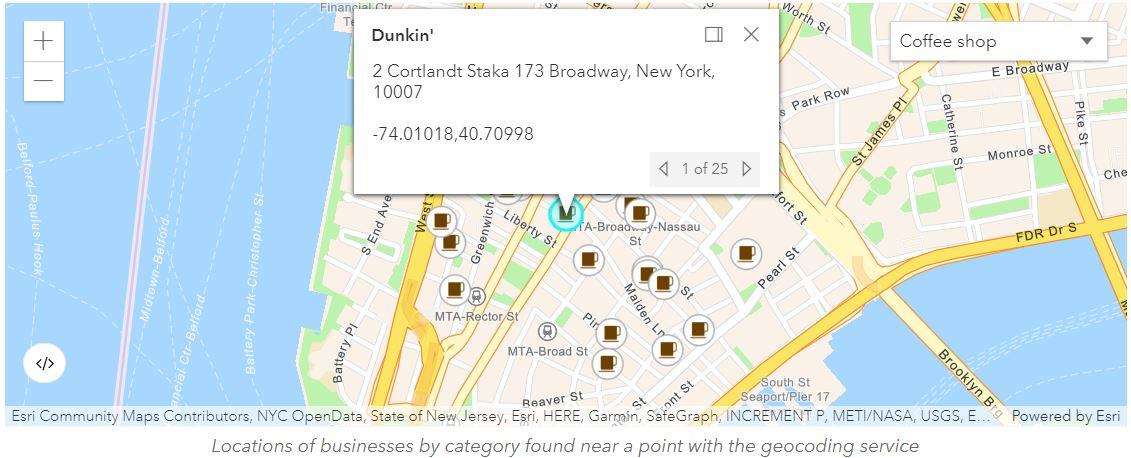

 - Search for intersections: In addition to addresses or street names, the Geocoding Service can search for and locate street intersections. An intersection is the point at which two streets cross each other. An intersection search consists of the intersecting street names plus the containing administrative division or postal code.

   - Reverse geocode: The Geocoding Service can reverse geocode an x/y location and return the nearest address or place. Reverse geocoding is the process of converting a point to an address or place. For example, you can convert `-79.3871 longitude and 43.6426 latitude` to `CN Tower, 301 Front St W, Toronto, Ontario, M5V, CAN`. Generally speaking, you can use reverse geocoding to:
    - Get the nearest address to your current location;
    - Show an address or place name when you tap on a map;
    - Find the address for a geographic location.

 - Batch geocoding: Geocode place of interest or address queries with a single request using the Geocoding Service. An ArcGIS Developer or ArcGIS Online subscription is required to use the service. It is also known as bulk geocoding, the process of converting a list of addresses or place names to a set of complete addresses with locations. Batch geocoding is commonly used to: convert a number of addresses to complete addresses, find the locations for a list of addresses, perform large batches of geocoding, or geocode addresses that can be saved for future use.
     - Convert a number of addresses to complete addresses.
     - Find the locations for a list of addresses.
     - Perform large batches of geocoding.
     - Geocode addresses that can be saved for future use.
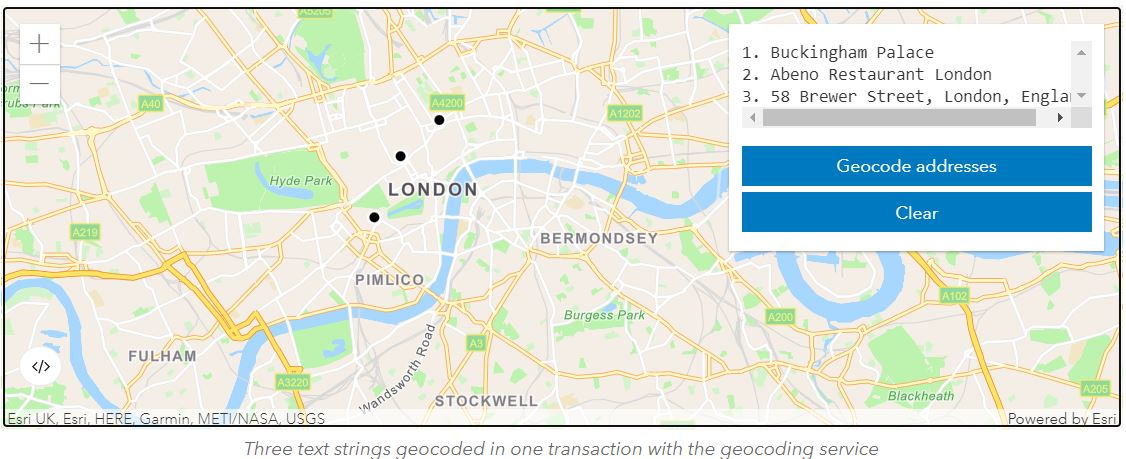

#### Geocoding coverage

For countries covered by a geocoding service, e.g. the ArcGIS World Geocoding Service, the address coverage, the supported language, and relative geocoding quality would vary. The `geocode_coverage` WebMap object displayed below illustrates the various levels.

The overall geocoding quality is a function of the degree of street-level address coverage in a country, knowledge of a country's address styles, and geocoding performance for addresses in that country. The quality levels are subject to change. Typically, the quality of geocoding for a given country improves over time and may be upgraded to a better level, but there may be instances where countries are downgraded to a lower level based on user feedback.

Countries for which there is no address coverage are classified as Level 4 and are white in the map. Even though there is no address or street-level coverage in these countries, there is still admin-level coverage available. This means that administrative divisions such as cities, counties, and provinces, as well as landmarks in some cases, can be found in them.

When multiple languages are listed in the Supported Languages column for a country, it does not necessarily mean that all addresses in the country are available in each language. In some cases, a language may only be supported within a particular region of a country or for a small subset of addresses. Generally, in the Level 1 and Level 2 tables, the first language listed is the primary language.

The information in the following tables only applies to street addresses and not to POIs (geocode candidates with Addr_type = POI).

<Item title:"ArcGIS Online Geocoding Service Coverage" type:Web Map owner:esri>
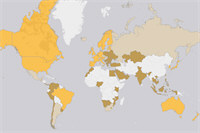

In [15]:
geocode_coverage = gis.content.search("ArcGIS Online Geocoding Service Coverage", outside_org=True)[0]
geocode_coverage


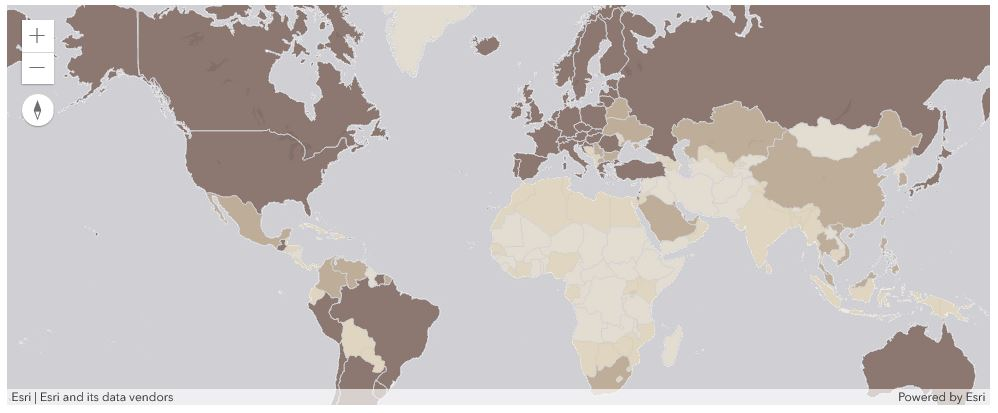

In [19]:
from arcgis.mapping import WebMap
WebMap(geocode_coverage)

##### Level 1

The darkest-shaded countries in the map are Level 1. They provide the highest quality geocoding experience. Address searches are likely to result in accurate matches to `PointAddress` and `StreetAddress` levels.

| Country Name | Supported Country Codes | Supported Languages | Supported Language Codes | Data Sources
| :- |-------------: |-------------:|-------------:| :-:
| Argentina | ARG, AR | Spanish | ES | HERE, Geonames
| Australia | AUS, AU | English | EN | PSMA Australia, HERE, Geonames
| Austria | AUT, AT | German, Croatian, Croatian Transliterated | DE, CR, EN | BEV, HERE, Geonames
| ... | ... | ... | ... | ... | ...

##### Level 2
The medium-shaded countries in the map are Level 2. They provide a good geocoding experience. Address searches often result in `PointAddress` and `StreetAddress` level matches, but sometimes match to `StreetName` and `Admin` levels.

| Country Name | Supported Country Codes | Supported Languages | Supported Language Codes | Data Sources
| :- |-------------: |-------------:|-------------:| :-:
| Andorra | AND, AD | Catalan | CA | HERE, Geonames
| Belarus | BLR, BY | Belarusian, Belarusian Transliterated, Russian, Russian Transliterated | BE, RU, EN | HERE, Geonames
| Bulgaria | BGR, BG | Bulgarian, Bulgarian Transliterated | BG, EN | HERE, Geonames
| ... | ... | ... | ... | ... | ...

##### Level 3
The lightest-shaded countries in the map are Level 3. They provide a fair geocoding experience. Address searches will more likely match to `StreetName` or `Admin` levels.

| Country Name | Supported Country Codes | Supported Languages | Supported Language Codes | Data Sources
| :- |-------------: |-------------:|-------------:| :-:
| Albania | ALB, AL | Albanian | SQ | HERE, Geonames
| Algeria | DZA, DZ | Arabic, French | AR, FR | HERE, Geonames
| American Samoa | ASM, AS, USA, US | English | EN | HERE, Geonames
| ... | ... | ... | ... | ... | ...

##### Level 4
The unshaded countries in the map are Level 4. They only provide `Admin-level` matches.

### Cost of geocoding

Usage of ArcGIS World Geocoding Service operations can be paid-only (e.g., when performing `geocode()`), or can be free (e.g., while using `suggest()`). Other operations can be either free or paid, depending on whether you are using them for search capabilities only, such as temporarily displaying the results, or storing the results for later use (when using `for_storage=True`). Please see the table below for more information, or check up the <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-free-vs-paid.htm">REST API help doc</a>.

| Function | Description | Cost
| :- |-------------: | :-:
|geocode()| To match addresses | paid
|suggest()| To return a list of suggested matches for the input text | free
|reverse_geocode()| To find the address of a location (x and y coordinates)| free(view-only) / paid(to store results)

To be more specific about paid services, for instance, for `geocoding` a table of addresses, `rematching` a geocoded feature class, and `reverse geocoding` a feature class, the service operates under a `credit-based usage model` that allows you to pay only for what you use. If you don't already have a subscription to `an ArcGIS Online for organizations`, you can purchase one or request <a href="https://links.esri.com/arcgis-online-free-trial">a free trial</a>. For more information on the credit-based usage, see <a href="https://links.esri.com/geocoding-service-credits">service credits for geocoding</a>.

| Function | Description | Cost
| :- |-------------: | :-:
|geocode()| To match addresses using ArcGIS World Geocoding Service or a view of this locator | 40 credits per 1,000 geocodes

## Layout of the `arcgis.geocoding` module

The class functions and the `Geocoder` class as defined in the `geometry` module can be seen in the Object Model Diagram drawn below:

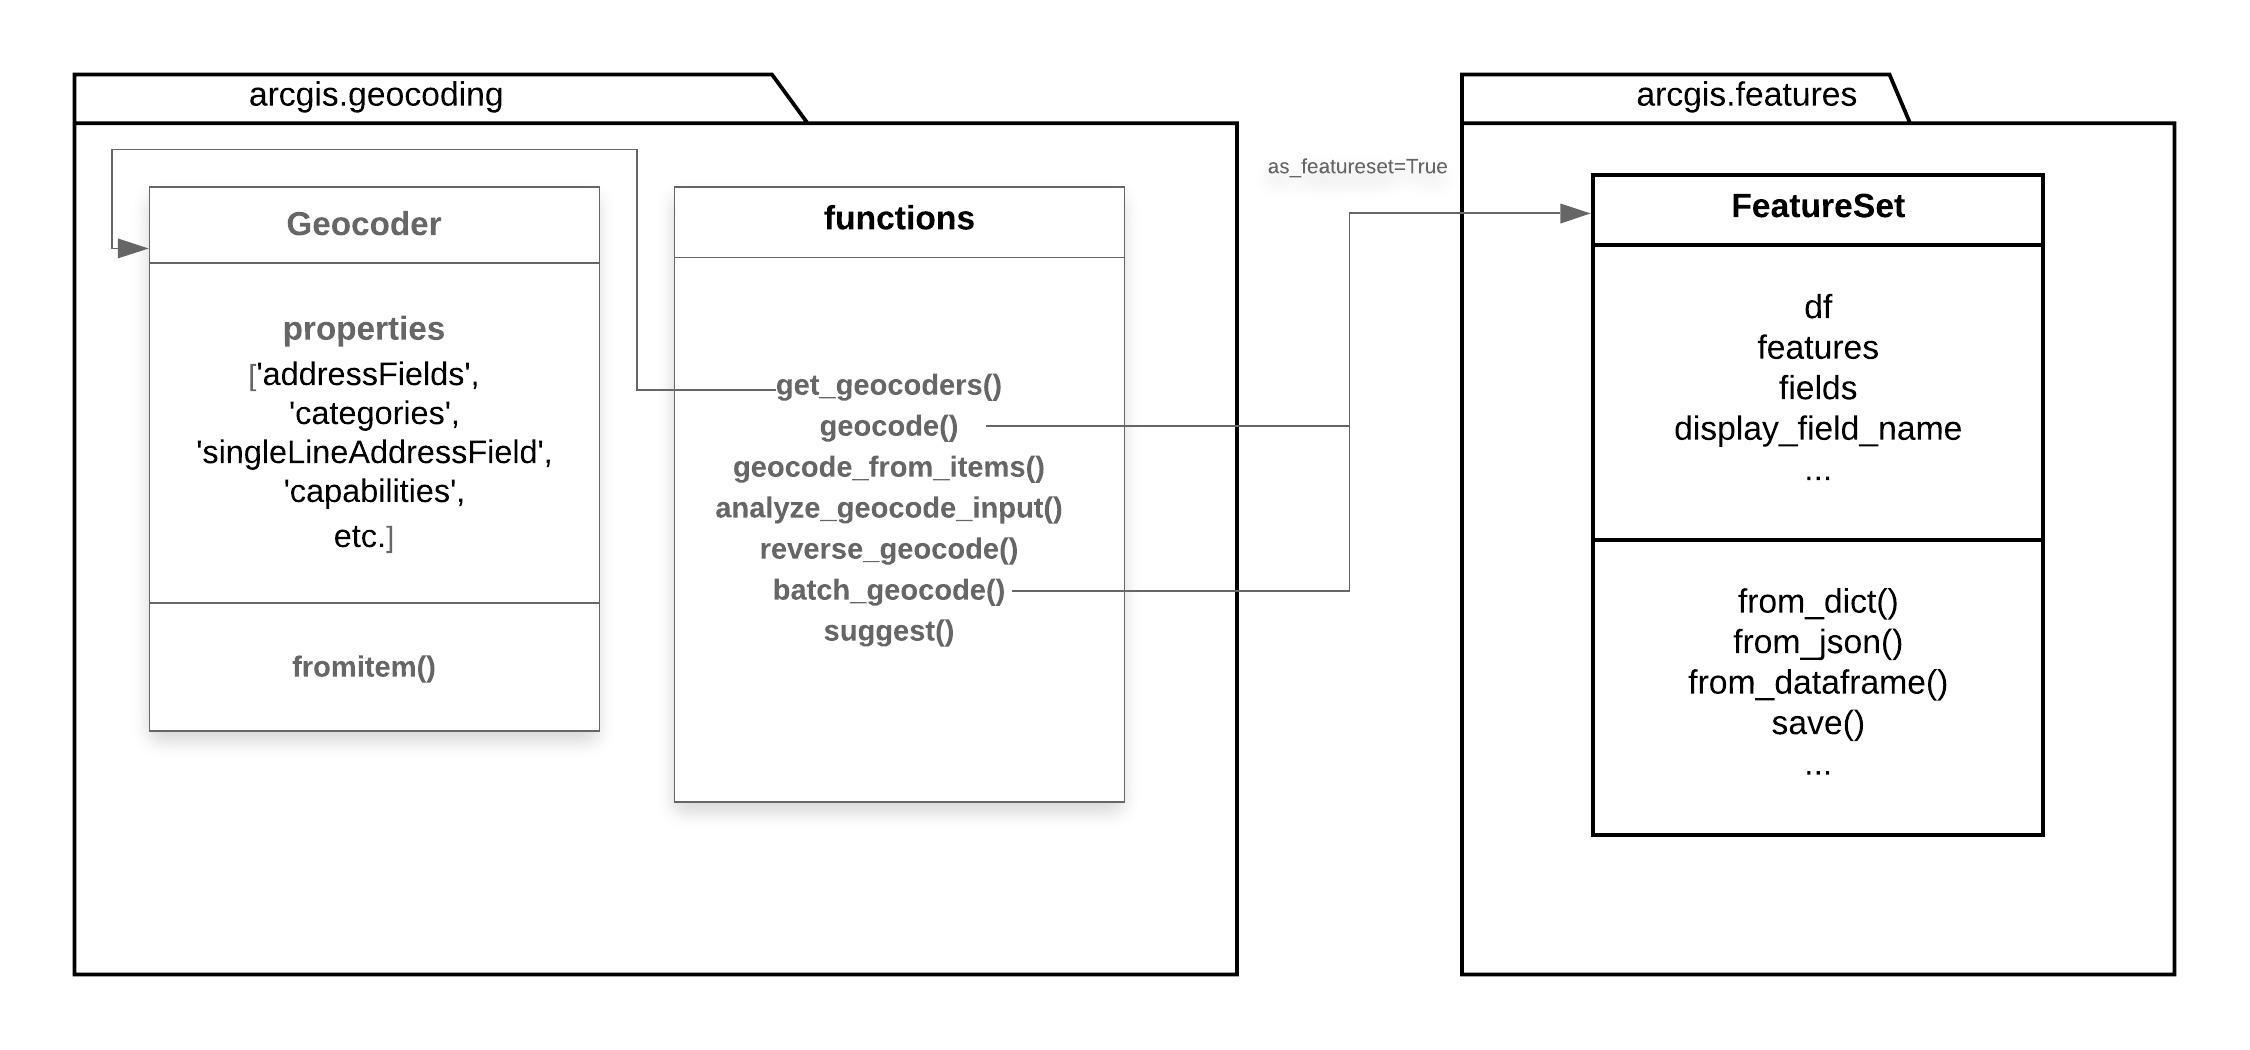

## Conclusions

In Part 1 of the geocoding guides, we have discussed what is geocoding, two ways to perform geocoding, how geocoding works, and the requirements and costs needed to perform geocoding. For advanced topics of geocoding, please go to <a href="https://developers.arcgis.com/python/guide/part2-locating-addresses/">Part 2</a> of the sequential guides.